## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [72]:
diab = pd.read_csv('diabetes.csv')
diab.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [73]:
ratio = pd.DataFrame(diab['Outcome'].value_counts()/diab['Outcome'].count())
ratio.reset_index(inplace = True)
ratio

,index,Outcome
0,0,0.651042
1,1,0.348958


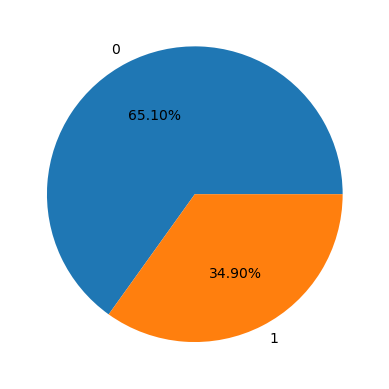

In [74]:
#파이 그래프 그리기
plt.pie(x = list(ratio['Outcome']), 
           labels = list(ratio['index']),
           autopct = '%.2f%%')
plt.show() #1이 당뇨병 유, 0이 무

1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [75]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [93]:
X = diab.drop(columns='Outcome') # 독립변수
y = diab['Outcome'] # 종속변수

In [96]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123, stratify=y) # 데이터셋 분할

print('Xtrain_shape', X_train.shape)
print('Xtest_shape', X_test.shape)
print('ytrain_shape', y_train.shape)
print('ytest_shape', y_test.shape)

Xtrain_shape (537, 8)
Xtest_shape (231, 8)
ytrain_shape (537,)
ytest_shape (231,)


1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

보통 test size을 0.3 또는 0.2로 설정하여 train:test = 7:3 or 8:2로 맞추는 것이 일반적이다.
            
너무 작은 train set을 사용하면 모델이 데이터를 충분히 학습하지 못해 underfitting이 발생할 수 있고, 학습하는 데 너무 오랜 시간이 걸릴 수 있다. 
너무 큰 train set을 사용하면 모델이 특정 데이터에 너무 맞춰져서 다른 데이터에 대한 일반화 능력이 떨어져 overfitting이 발생할 수 있다. 
test set은 모델이 처음 보는 데이터를 잘 일반화하고 예측할 수 있는지를 평가하는 데 충분한 양이어야 한다.
추천 비율은 이를 충족시키는 비율이다.
게다가 7:3과 8:2 비율로 선택하면 계산하는 데 있어 직관적이고 쉽기 때문에 이 정도로 설정하는 것이 좋다고 한다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

주로 분류 문제에서 데이터 셋을 train, test로 나눌 때 클래스 간의 불균형이 있을 때 클래스의 분포 비율까지 맞춰주는 역할을 한다.
train set과 test set은 모두 원본 데이터셋의 클래스 분포를 잘 대표해야 한다.
stratify=y 옵션을 사용하면 각 클래스의 비율이 유지되면서 데이터가 나눠지므로, 
모델이 각 클래스를 공정하게 학습하고 일반화하는 데 도움이 된다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [79]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    #accuracy, precision, recall, f1, roc_auc(roc_auc_score의 경우 y_test와 pred_proba로 측정)는 직접 작성
    
    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

Confusion Matrix는 분류 문제에서 예측 오류가 얼마인지, 어떤 유형의 오류가 발생하고 있는지 나타내는 지표이다.
행에는 실제 label이 있고, 열에는 예측된 label이 있다.
전체 행렬의 합계 = 샘플의 수

각 원소는 다음을 나타낸다.

True Negative(TN)   False Positive(FP)

False Negative(FN)  True Positive(TP)

TN+TP = 올바르게 분류한 개수
FN+FP = 분류오류 개수
모든 숫자가 대각원소에 있고, 대각원소가 아닌 곳엔 0이 있으면 완벽한 분류이다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [100]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:,1]

In [101]:
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8435


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

solver 파라미터는 로지스틱 회귀모델을 학습시킬 때 최적화에 사용할 알고리즘을 선택하는 역할을 한다.

'newton-cg': 뉴튼-랩슨(Newton-Raphson)방법 사용, 여러 번의 업데이트를 통해서 비용함수를 최소화하는 파라미터의 값을 찾는 방법
             규제화 방법: l2, none

'lbfgs': Limited-memory Broyden-Fletcher-Goldfarb-Shnno의 약자. 뉴튼-랩슨 방법을 약간 변형한 방법
         규제화 방법: l2, none

'liblinear': 경사하강법과 유사, 경사하강법은 한 번에 여러개의 파라미터를 업데이트하지만, liblinear은 한 번에 하나의 파라미터만 업데이트
             규제화 방법: l1, l2

'sag': Stochastic Average Gradient descent의 약자. 경사하강법과 유사
       규제화 방법: l2, none

'saga': sag 알고리즘을 개선한 방식. l1, l2, elasticnet, none까지 모두 사용가능하게 지원한다. 다른 solver보다 빠르게 수렴하고 더 좋은 정확도를 제공

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred는 최종적인 예측값을 출력하는 결과, 
       회귀모델의 경우 구체적인 특정 값을 출력하고, 분류모델의 경우 확률이 가장 높은 클래스를 출력한다.

pred_proba는 predict probability, 분류모델에서 각 클래스에 대해 예측한 확률을 출력한다.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [102]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

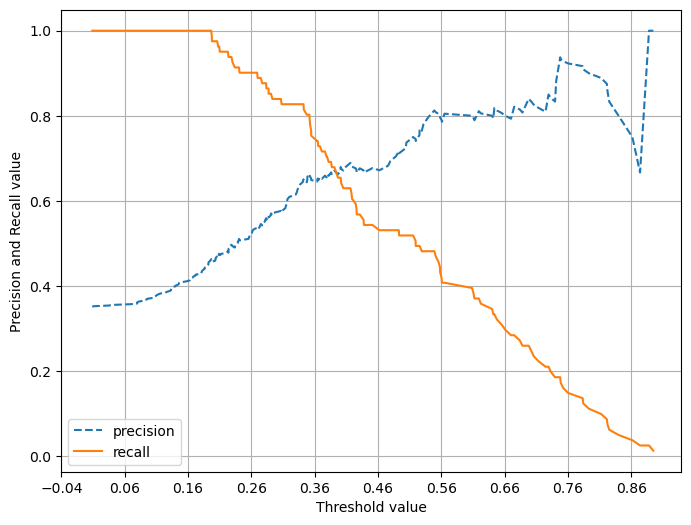

In [104]:
pred_proba_c1 = clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [105]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [106]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
diab['Glucose'].replace(0, diab['Glucose'].mean(), inplace = True)
diab['BloodPressure'].replace(0, diab['BloodPressure'].mean(), inplace = True)
diab['Insulin'].replace(0, diab['Insulin'].mean(), inplace = True)
diab['SkinThickness'].replace(0, diab['SkinThickness'].mean(), inplace = True)
diab['BMI'].replace(0, diab['BMI'].mean(), inplace = True)

In [107]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

feature scaling은 독립변수(특성)의 스케일을 조정하는 작업을 말한다.
알고리즘의 성능을 향상시키고, 모델이 특정 데이터에 편향성을 갖는 것을 방지하는 역할을 한다. 그리고 계산의 효율성을 높인다.

표준화(Standardization): 특성의 평균을 0으로, 표준 편차를 1로 만든다.

정규화(Normalization): 특성의 값을 특정 범위 내로 조정한다. 주로 모든 특성 값들을 [0, 1] 범위로 조정한다.

최대-최소 스케일링(Min-Max Scaling): 특성의 값을 최소값과 최대값 사이의 범위로 조정한다.

로버스트 스케일링(Robust Scaling): 중앙값과 IQR(Interquartile Range)를 사용하여 특성의 스케일을 조정한다.

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [110]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [111]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
pred_proba = clf.predict_proba(X_test_scaled)[:,1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [112]:
#상관계수 계산
corr_diab = diab.corr()
corr_diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

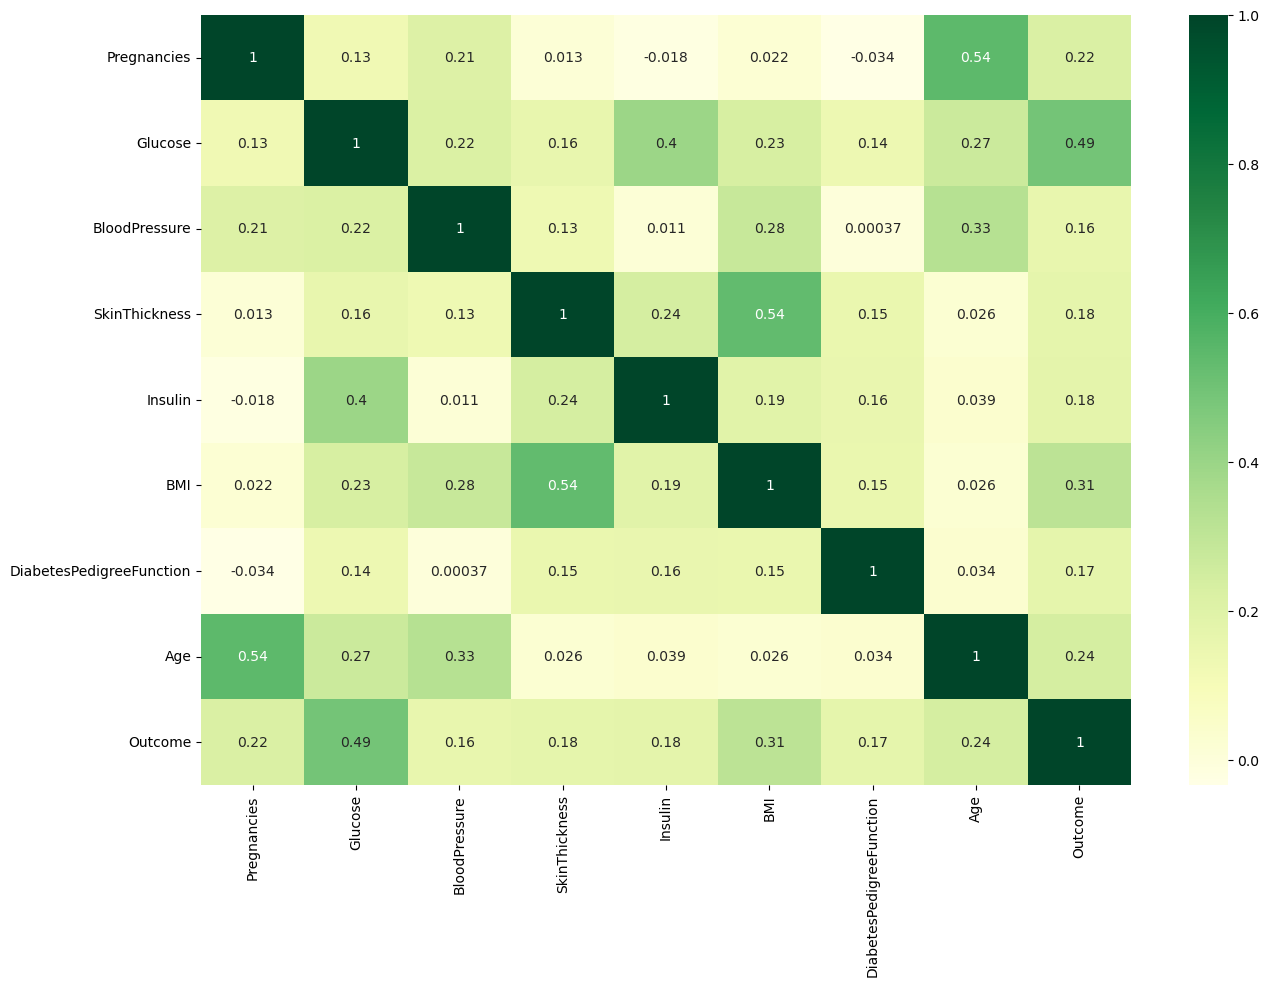

In [113]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize = (15,10))
sns.heatmap(corr_diab, cmap = 'YlGn', annot=True)

독립변수 중에서는 BMI와 SkinThickness, Age와 Pregnancies의 Insulin과 Glucose의 상관관계가 상대적으로 높게 나왔다.
따라서 상관관계가 높은 변수 쌍 중 하나를 제거해 다시 로지스틱회귀분석을 진행하여 성능을 검사해보겠다.
여기서는 Outcome가 상관관계가 더 낮은 변수를 삭제했다.

In [121]:
diab1 = diab.drop(['SkinThickness', 'Pregnancies', 'Insulin'], axis=1)
diab1

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,33.6,0.627,50,1
1,85.0,66.0,26.6,0.351,31,0
2,183.0,64.0,23.3,0.672,32,1
3,89.0,66.0,28.1,0.167,21,0
4,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101.0,76.0,32.9,0.171,63,0
764,122.0,70.0,36.8,0.340,27,0
765,121.0,72.0,26.2,0.245,30,0
766,126.0,60.0,30.1,0.349,47,1


In [122]:
X1 = diab1.drop(columns='Outcome') # 독립변수
y1 = diab1['Outcome'] # 종속변수

In [123]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [130]:
X1_train_scaled, X1_test_scaled, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size = 0.3, random_state=123, stratify=y)

In [131]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X1_train_scaled, y1_train)
pred = clf.predict(X1_test_scaled)
pred_proba = clf.predict_proba(X1_test_scaled)[:,1]

clf_eval(y1_test, pred, pred_proba)

오차 행렬,
 [[132  18]
 [ 37  44]]
정확도: 0.7619, 정밀도: 0.7097, 재현율: 0.543210, F1: 0.6154, AUC:0.8453


변수 제거 전과 비교했을 때, 올바르게 분류한 개수와 F1 score가 아주 조금 상승했다..
< 오차 행렬,
  [[132  18]
  [ 38  43]]
  정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584 >